['Run', 'Event', 'type1', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M']
Filtered data size after muon ID and kinematic cuts: 4858 events
Z boson mass range with ±4.0% uncertainty:
From 87.540 GeV to 94.835 GeV
Number of Z boson events in zoomed region: 3357


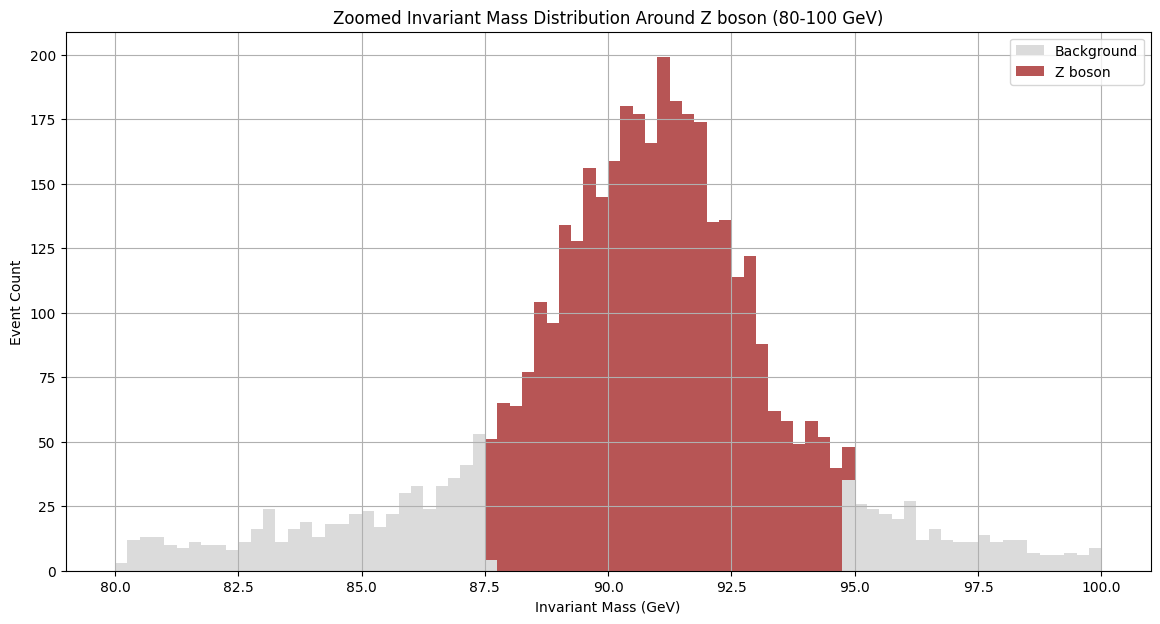

Number of Z boson events in full range: 3357


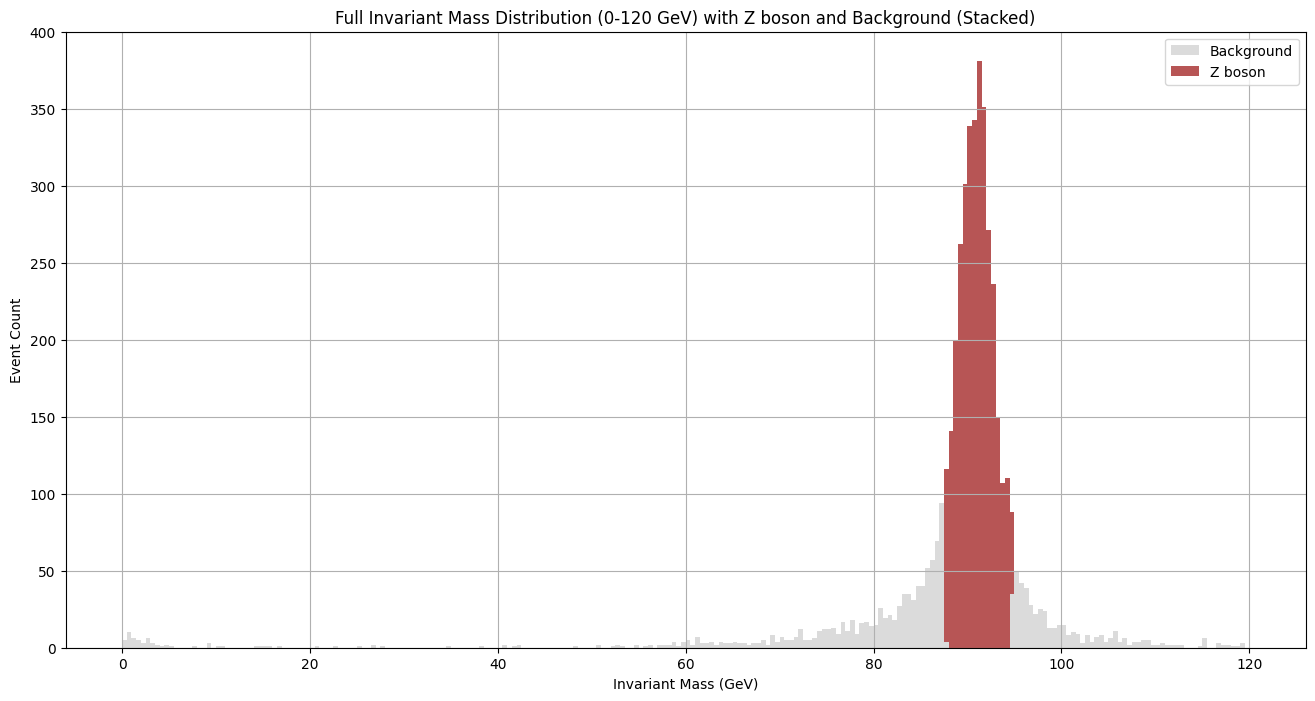

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load and preprocess data ---

data = pd.read_csv('/Users/xDAyN/Desktop/cs project/School Project/Dimuon_DoubleMu.csv')
print(data.columns.tolist())

# --- Apply muon-level selection ---
# Keep events where BOTH muons are:
# - Global muons (type == 'G')
# - pt > 25 GeV
# - |eta| < 2.4
# - Opposite charge (Q1 * Q2 < 0)

mask_muons = (
    (data['type1'] == 'G') &
    (data['type2'] == 'G') &
    (data['pt1'] > 25) &
    (data['pt2'] > 25) &
    (np.abs(data['eta1']) < 2.4) &
    (np.abs(data['eta2']) < 2.4) &
    (data['Q1'] * data['Q2'] < 0)
)

data = data[mask_muons].reset_index(drop=True)
print(f"Filtered data size after muon ID and kinematic cuts: {len(data)} events")

# --- Z boson reconstruction cut ---
# Just ensure we only consider invariant masses in the range 0 to 120 (as per original plot)
# But we’ll only highlight the Z boson mass window separately in the plots

data = data[(data['M'] >= 0) & (data['M'] <= 120)].reset_index(drop=True)

# --- Z boson nominal mass and uncertainty ---

mZ_nominal = 91.1876  # GeV
uncertainty_physics = 0.03   # 3%
uncertainty_detector = 0.01  # 1%
total_uncertainty = uncertainty_physics + uncertainty_detector  # 4%

mass_lower = mZ_nominal * (1 - total_uncertainty)
mass_upper = mZ_nominal * (1 + total_uncertainty)

print(f"Z boson mass range with ±{total_uncertainty*100:.1f}% uncertainty:")
print(f"From {mass_lower:.3f} GeV to {mass_upper:.3f} GeV")

# --- First plot: zoomed-in on Z boson region (80-100 GeV) ---

plot_min_zoom = 80
plot_max_zoom = 100
bins_zoom = 80  # 0.25 GeV per bin approx.

events_zoom = data[(data['M'] >= plot_min_zoom) & (data['M'] <= plot_max_zoom)]
is_z_zoom = (events_zoom['M'] >= mass_lower) & (events_zoom['M'] <= mass_upper)
is_bg_zoom = ~is_z_zoom

z_masses_zoom = events_zoom[is_z_zoom]['M']
bg_masses_zoom = events_zoom[is_bg_zoom]['M']

print(f"Number of Z boson events in zoomed region: {len(z_masses_zoom)}")

plt.figure(figsize=(14, 7))
plt.hist([bg_masses_zoom, z_masses_zoom], bins=bins_zoom, range=(plot_min_zoom, plot_max_zoom),
         color=['lightgray', 'brown'], alpha=0.8,
         label=['Background', 'Z boson'], stacked=True)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Event Count')
plt.title('Zoomed Invariant Mass Distribution Around Z boson (80-100 GeV)')
plt.legend()
plt.grid(True)
plt.show()

# --- Second plot: full invariant mass range (0-120 GeV) ---

plot_min_full = 0
plot_max_full = 120
bins_full = 240  # 0.5 GeV per bin

events_full = data[(data['M'] >= plot_min_full) & (data['M'] <= plot_max_full)]
is_z_full = (events_full['M'] >= mass_lower) & (events_full['M'] <= mass_upper)
is_bg_full = ~is_z_full

z_masses_full = events_full[is_z_full]['M']
bg_masses_full = events_full[is_bg_full]['M']

print(f"Number of Z boson events in full range: {len(z_masses_full)}")

plt.figure(figsize=(16, 8))
plt.hist([bg_masses_full, z_masses_full], bins=bins_full, range=(plot_min_full, plot_max_full),
         color=['lightgray', 'brown'], alpha=0.8,
         label=['Background', 'Z boson'], stacked=True)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Event Count')
plt.title('Full Invariant Mass Distribution (0-120 GeV) with Z boson and Background (Stacked)')
plt.legend()
plt.grid(True)
plt.show()
